<a href="https://colab.research.google.com/github/sumeet6510/Linear_Regression_Implementation/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
File_path = '/content/drive/MyDrive/Colab Notebooks/Module 4 _ Machine Learning/4.3 Linear Regression 2/'
df = pd.read_csv(File_path + 'Copy of 50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

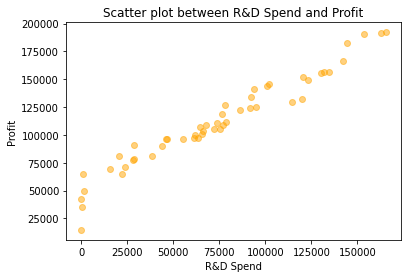

In [ ]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha = 0.5, color='orange')
plt.title('Scatter plot between R&D Spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

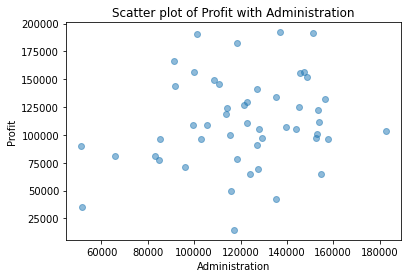

In [ ]:
plt.scatter(df['Administration'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

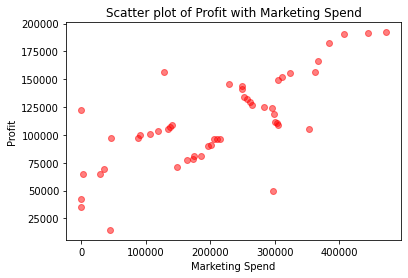

In [ ]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.5, color='red')
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

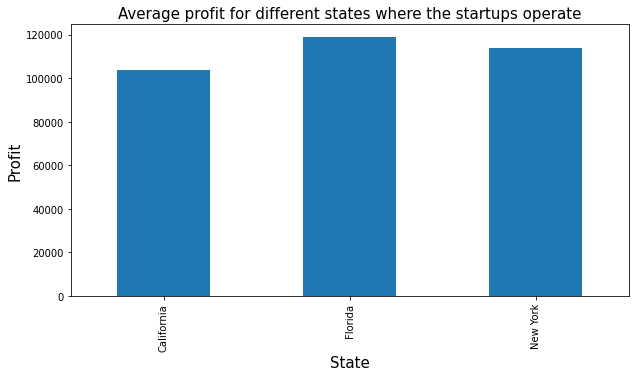

In [ ]:
#create fig between profit and state

ax = df.groupby('State')['Profit'].mean().plot.bar(figsize=(10,5), fontsize=10)

#set title
ax.set_title("Average profit for different states where the startups operate", fontsize = 15)

#set x and y label
# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [ ]:
# Create dummy variables for the catgeorical variable State
df['NewYork_State'] = np.where(df['State']=='New York', 1, 0)
df['California_State'] = np.where(df['State']=='California', 1, 0)
df['Florida_State'] = np.where(df['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable = 'Profit'

In [ ]:
# Create a list of independent variables
Independent_variable = list(set(df.columns.tolist()) - {dependent_variable})
Independent_variable

['Florida_State',
 'Administration',
 'California_State',
 'NewYork_State',
 'Marketing Spend',
 'R&D Spend']

In [ ]:
# Create the data of independent variables
X = df[Independent_variable].values

# Create the dependent variable data
y = df[dependent_variable].values

In [ ]:
df[Independent_variable].head()

,Florida_State,Administration,California_State,NewYork_State,Marketing Spend,R&D Spend
0,0,136897.80,0,1,471784.10,165349.20
1,0,151377.59,1,0,443898.53,162597.70
2,1,101145.55,0,0,407934.54,153441.51
3,0,118671.85,0,1,383199.62,144372.41
4,1,91391.77,0,0,366168.42,142107.34


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
X_train[0:10]

array([[1.0000000e+00, 1.0305749e+05, 0.0000000e+00, 0.0000000e+00,
        2.1463481e+05, 5.5493950e+04],
       [0.0000000e+00, 8.5047440e+04, 0.0000000e+00, 1.0000000e+00,
        2.0551764e+05, 4.6014020e+04],
       [1.0000000e+00, 1.4413598e+05, 0.0000000e+00, 0.0000000e+00,
        1.3405007e+05, 7.5328870e+04],
       [0.0000000e+00, 1.5769392e+05, 1.0000000e+00, 0.0000000e+00,
        2.1079767e+05, 4.6426070e+04],
       [1.0000000e+00, 1.1417579e+05, 0.0000000e+00, 0.0000000e+00,
        2.9491957e+05, 9.1749160e+04],
       [1.0000000e+00, 1.4553006e+05, 0.0000000e+00, 0.0000000e+00,
        3.2387668e+05, 1.3029813e+05],
       [1.0000000e+00, 1.5654742e+05, 0.0000000e+00, 0.0000000e+00,
        2.5651292e+05, 1.1994324e+05],
       [0.0000000e+00, 1.2415304e+05, 0.0000000e+00, 1.0000000e+00,
        1.9039300e+03, 1.0002300e+03],
       [0.0000000e+00, 5.1743150e+04, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 5.4205000e+02],
       [0.0000000e+00, 1.5303206e+05,

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[1.        , 0.48655174, 0.        , 0.        , 0.45494286,
        0.33561668],
       [0.        , 0.3173015 , 0.        , 1.        , 0.43561799,
        0.2782839 ],
       [1.        , 0.87258866, 0.        , 0.        , 0.28413435,
        0.45557444],
       [0.        , 1.        , 1.        , 0.        , 0.44680961,
        0.2807759 ],
       [1.        , 0.59103645, 0.        , 0.        , 0.62511553,
        0.55488118],
       [1.        , 0.88568959, 0.        , 0.        , 0.68649342,
        0.7880179 ],
       [1.        , 0.98922572, 0.        , 0.        , 0.54370828,
        0.72539353],
       [0.        , 0.6847981 , 0.        , 1.        , 0.0040356 ,
        0.0060492 ],
       [0.        , 0.00432296, 0.        , 1.        , 0.        ,
        0.00327821],
       [0.        , 0.95618996, 0.        , 1.        , 0.22709197,
        0.39676926]])

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

44153.95466784866

In [ ]:
regressor.coef_

array([-8.72645791e+02,  3.49927567e+03,  8.66383692e+01,  7.86007422e+02,
        1.72720281e+04,  1.27892182e+05])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
mean_squared_error(y_test, y_pred)

83502864.03257728

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [ ]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test, y_pred)

0.9347068473282426